In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [22]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [23]:
df.shape

(3554, 18)

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [25]:
# drop this columns
df = df.drop(columns = ['society','price_per_sqft'])

In [26]:
df.shape

(3554, 16)

In [27]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


<AxesSubplot: xlabel='luxury_score'>

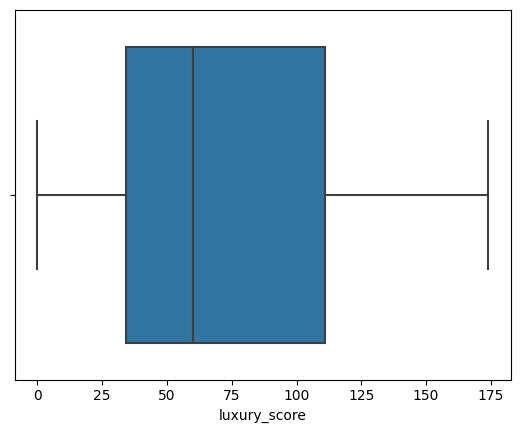

In [28]:
# we will convert the luxury columns into categorical columns.
sns.boxplot(x = df['luxury_score'])

In [29]:
def luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    else:
        return "High"

In [30]:
df['luxury_category'] = df['luxury_score'].apply(luxury)

In [32]:
df['luxury_category'].value_counts()

Low       1594
Medium    1465
High       495
Name: luxury_category, dtype: int64

## FloorNum

In [34]:
df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low


<AxesSubplot: xlabel='floorNum'>

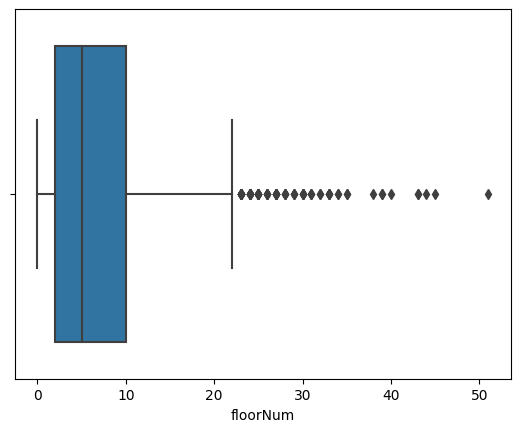

In [36]:
sns.boxplot(x = df['floorNum'])

In [38]:
# convert the floornum columns into categorical columns
def floor(num):
    if 0<= num <= 2:
        return 'Low Floor'
    elif 3<= num <= 10:
        return "Mid Floor"
    elif 11<= num <= 51:
        return 'High Floor'
    else:
        return None

In [39]:
df['floorc_category'] = df['floorNum'].apply(floor)

In [41]:
df['floorc_category'].value_counts()

Mid Floor     1797
Low Floor      953
High Floor     804
Name: floorc_category, dtype: int64

In [42]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floorc_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [43]:
# now we can delete this two columns
df = df.drop(columns = ['floorNum','luxury_score'])

In [44]:
df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floorc_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor


## Feature Selection

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
train_df = df.copy()

In [48]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floorc_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


### Convert categorical col into numerical col

In [60]:
cat = train_df.select_dtypes(include = ['object']).columns
cat

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floorc_category'],
      dtype='object')

In [62]:
for col in cat:
    oe = OrdinalEncoder()
    train_df[col] = oe.fit_transform(train_df[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [83]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floorc_category
0,0.0,36.0,0.82,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,0.95,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,0.32,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,1.60,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,0.48,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [86]:
y = train_df['price']

In [87]:
x = train_df.drop(columns = ['price'])

In [88]:
print(train_df.shape)
print(x.shape)
print(y.shape)

(3554, 16)
(3554, 15)
(3554,)


# Technique 1 - Correlation Analysis

In [92]:
train_df.corr()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floorc_category
property_type,1.000000,-0.230248,0.503728,0.438835,0.399672,-0.055566,-0.259286,0.290978,0.120523,0.055980,0.248412,0.240272,0.018672,0.054412,-0.020667,0.097604
sector,-0.230248,1.000000,-0.212084,-0.174173,-0.187618,-0.090282,0.063428,-0.176501,0.001582,-0.119474,-0.050693,-0.029792,0.020109,0.004661,0.019611,-0.032989
price,0.503728,-0.212084,1.000000,0.591289,0.609777,0.269637,-0.134171,0.748574,0.242955,0.391930,0.305677,0.319852,-0.013064,0.225625,0.009788,0.042745
bedRoom,0.438835,-0.174173,0.591289,1.000000,0.811085,0.354894,-0.113424,0.604142,0.142489,0.372577,0.196482,0.279420,0.030372,0.202431,-0.009092,0.067360
bathroom,0.399672,-0.187618,0.609777,0.811085,1.000000,0.438727,-0.084823,0.608929,0.150367,0.475773,0.207252,0.284572,0.041219,0.238920,-0.019265,0.088396
balcony,-0.055566,-0.090282,0.269637,0.354894,0.438727,1.000000,0.009606,0.359194,0.168696,0.426762,0.137251,0.160154,0.069673,0.206282,0.000039,0.049980
agePossession,-0.259286,0.063428,-0.134171,-0.113424,-0.084823,0.009606,1.000000,-0.083258,0.019496,-0.049841,-0.051650,-0.040864,0.017505,-0.040707,-0.056656,-0.052434
built_up_area,0.290978,-0.176501,0.748574,0.604142,0.608929,0.359194,-0.083258,1.000000,0.170457,0.423296,0.195931,0.250193,-0.011809,0.169870,0.001303,0.005942
study room,0.120523,0.001582,0.242955,0.142489,0.150367,0.168696,0.019496,0.170457,1.000000,0.169348,0.220624,0.295568,0.021656,0.133722,0.009343,0.054043
servant room,0.055980,-0.119474,0.391930,0.372577,0.475773,0.426762,-0.049841,0.423296,0.169348,1.000000,0.153170,0.234604,-0.022810,0.252858,-0.065394,0.023769


<AxesSubplot: >

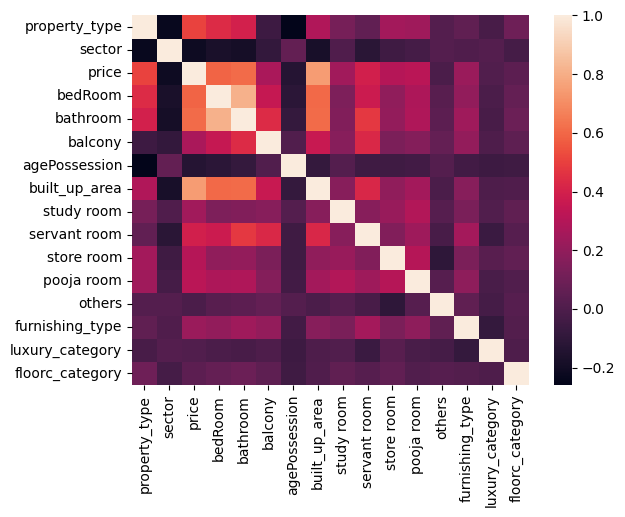

In [94]:
sns.heatmap(train_df.corr())

 we need correction with price col with all other columns

In [162]:
a = train_df.corr()['price'].iloc[1:].to_frame().rename(columns = {'price':'coeff_corr'}).reset_index().rename(columns = {'index':'features'})
a

,features,coeff_corr
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# Technique 2 - Random Forest Feature Importance

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor(n_estimators =100, random_state = 42)
rf.fit(x,y)

RandomForestRegressor(random_state=42)

In [164]:
b = pd.DataFrame({
    'features':x.columns,
    'coeff_rf': rf.feature_importances_}).sort_values (by = 'coeff_rf',ascending = False)
b

,features,coeff_rf
6,built_up_area,0.650541
1,sector,0.102670
0,property_type,0.100079
3,bathroom,0.025882
2,bedRoom,0.024041
8,servant room,0.019320
5,agePossession,0.014519
4,balcony,0.012576
12,furnishing_type,0.010604
7,study room,0.008383


# Technique 3 - Gradient Boosting Feature Importance

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
gb = GradientBoostingRegressor()

In [124]:
gb.fit(x,y)

GradientBoostingRegressor()

In [165]:
c = pd.DataFrame({
    'features' : x.columns,
    'coeff_gb': gb.feature_importances_
}).sort_values(by = 'coeff_gb',ascending= False)
c

,features,coeff_gb
6,built_up_area,0.677930
1,sector,0.102705
0,property_type,0.098466
2,bedRoom,0.038356
3,bathroom,0.035904
8,servant room,0.023274
9,store room,0.010356
5,agePossession,0.004019
7,study room,0.003033
12,furnishing_type,0.002804


# Technique 4 - LASSO
It is a linear model

In [132]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# linear model hai isliye scale kr do with standard scaler

In [136]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [147]:
x_scaled

array([[-0.51717989, -0.64082881, -0.07432949, ..., -0.66828148,
        -0.39518038, -0.34555271],
       [-0.51717989,  1.17168913, -0.87726873, ..., -0.66828148,
        -0.39518038,  0.89119889],
       [-0.51717989,  1.41745428, -0.87726873, ..., -0.66828148,
        -0.39518038, -1.58230432],
       ...,
       [-0.51717989, -1.04019718, -1.68020797, ...,  1.03794867,
         1.05272793,  0.89119889],
       [ 1.9335632 , -0.39506367,  1.53154899, ..., -0.66828148,
         1.05272793,  0.89119889],
       [-0.51717989,  0.4343937 , -0.07432949, ...,  1.03794867,
         1.05272793, -1.58230432]])

In [149]:
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(x_scaled,y)

Lasso(alpha=0.01, random_state=42)

In [166]:
# extract coefficient
d = pd.DataFrame({
    'features': x.columns,
    'coeff_lasso' : lasso.coef_}).sort_values(by='coeff_lasso',ascending =False)
d

,features,coeff_lasso
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


In [186]:
coeff = a.merge(b,on='features').merge(c,on='features').merge(d,on='features')
coeff = coeff.set_index('features')
coeff

,coeff_corr,coeff_rf,coeff_gb,coeff_lasso
features,,,,
sector,-0.212084,0.102670,0.102705,-0.069634
bedRoom,0.591289,0.024041,0.038356,0.014170
bathroom,0.609777,0.025882,0.035904,0.275042
balcony,0.269637,0.012576,0.001865,-0.043562
agePossession,-0.134171,0.014519,0.004019,-0.000000
built_up_area,0.748574,0.650541,0.677930,1.510173
study room,0.242955,0.008383,0.003033,0.171846
servant room,0.391930,0.019320,0.023274,0.160601
store room,0.305677,0.008329,0.010356,0.199655


Now here we normalize all the coefficient value

In [187]:
# normalize the score
coeff[['coeff_corr','coeff_rf','coeff_gb','coeff_lasso']].mean(axis = 1).sort_values(ascending = False)

features
built_up_area      0.896805
bathroom           0.236651
bedRoom            0.166964
servant room       0.148781
store room         0.131004
study room         0.106554
furnishing_type    0.100787
pooja room         0.100034
balcony            0.060129
luxury_category    0.018224
floorc_category    0.011831
others            -0.006838
sector            -0.019086
agePossession     -0.028908
dtype: float64